  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
[RangeIndex(start=0, stop=399, step=1), Index(['school', 'sex', 'age', 'address', 'famsi

/Users/zoe/miniconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


correlation of famrel and freetime: 0.14780099254636261
correlation of famrel and goout: 0.055210498519673044
correlation of famrel and Dalc: -0.08188055944071883
correlation of famrel and Walc: -0.11478666146364762
correlation of famrel and health: 0.0963661214554481
correlation of famrel and absences: -0.05034053765085846
correlation of famrel and G1: 0.014255080620935003
correlation of famrel and G2: -0.026826664189477004
correlation of famrel and G3: 0.044405544002244265
correlation of freetime and goout: 0.28566388077389604
correlation of freetime and Dalc: 0.2096877573374976
correlation of freetime and Walc: 0.14816476119255537
correlation of freetime and health: 0.07511758287415699
correlation of freetime and absences: -0.0566865129094151
correlation of freetime and G1: 0.014130034481392495
correlation of freetime and G2: -0.011971903527870538
correlation of freetime and G3: 0.012605947100194317
correlation of goout and Dalc: 0.26975100274959135
correlation of goout and Walc: 0.

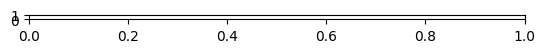

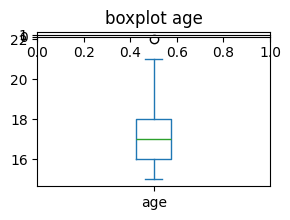

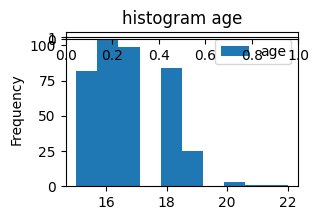

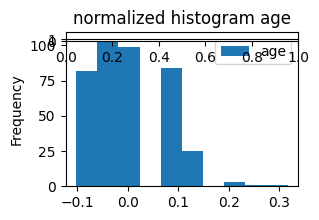

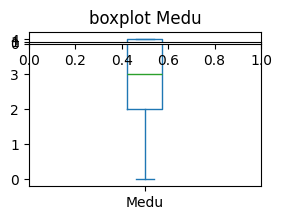

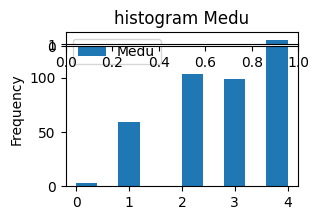

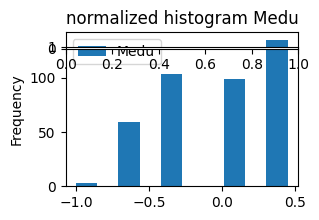

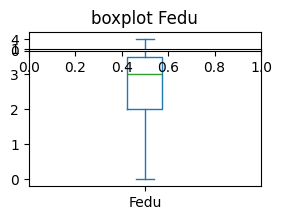

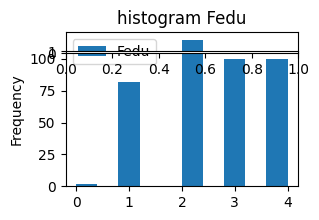

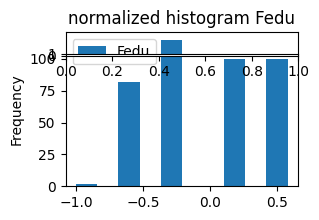

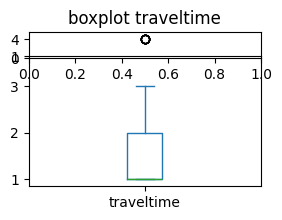

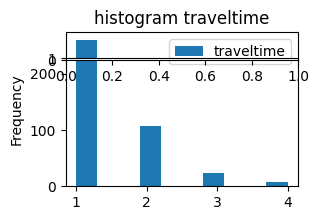

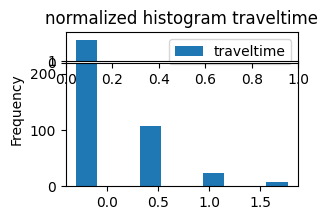

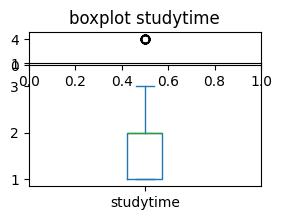

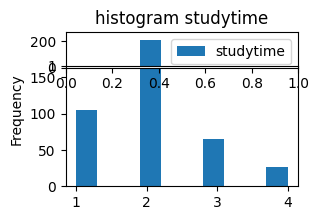

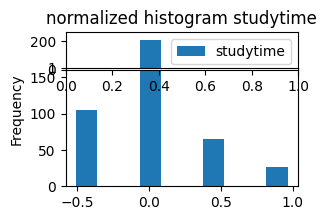

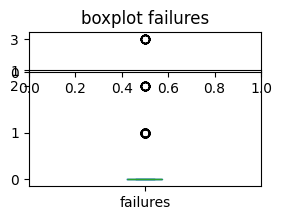

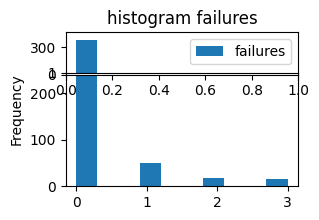

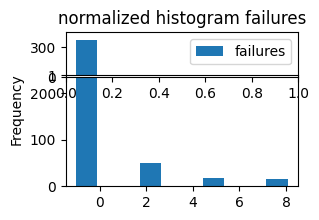

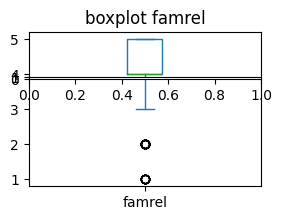

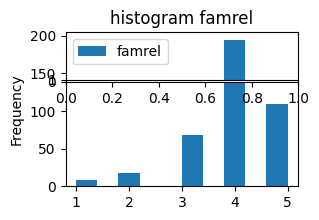

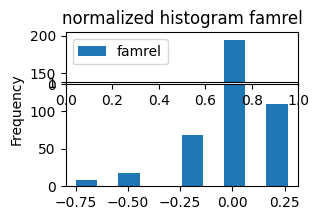

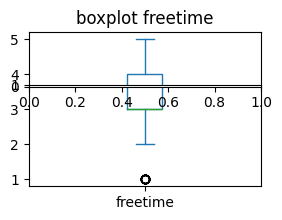

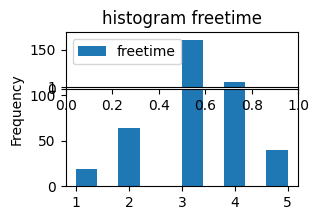

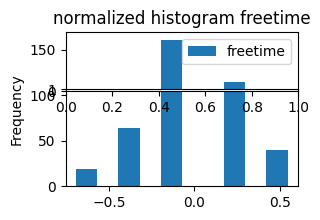

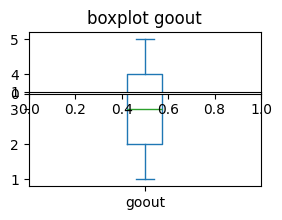

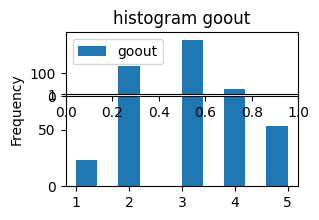

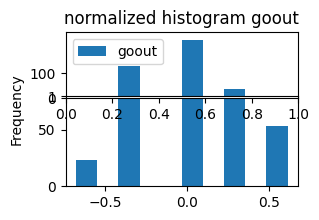

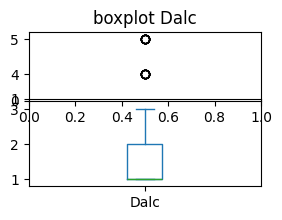

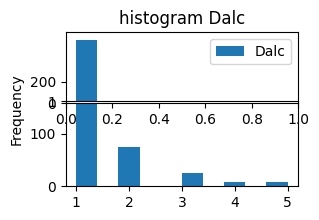

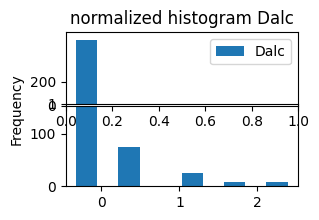

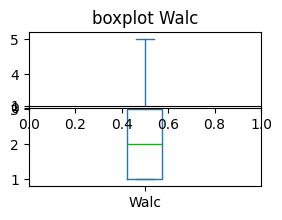

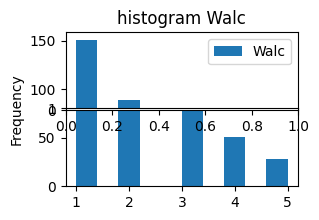

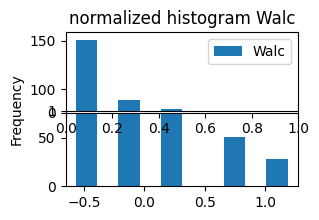

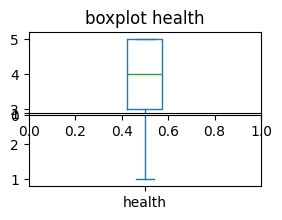

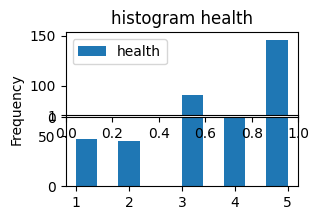

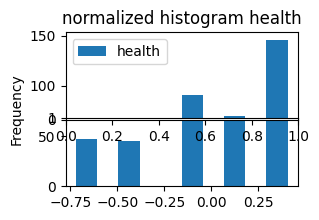

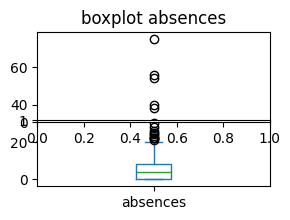

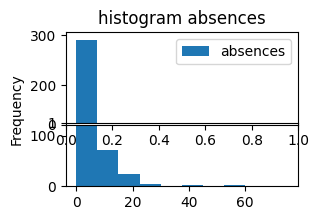

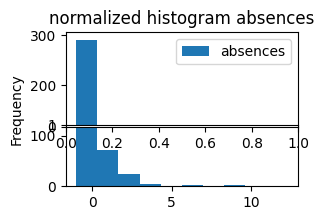

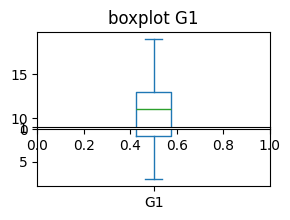

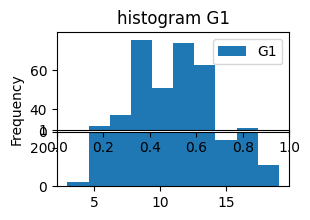

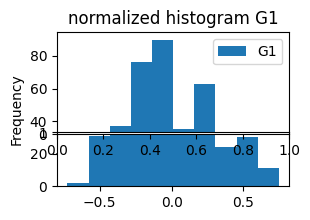

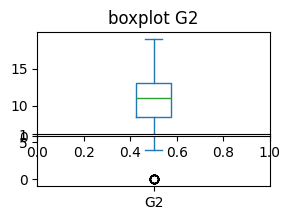

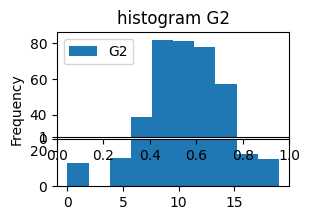

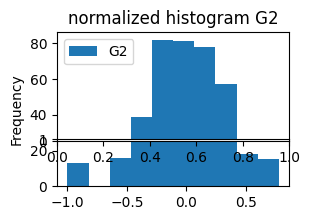

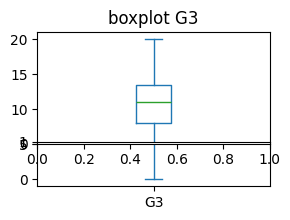

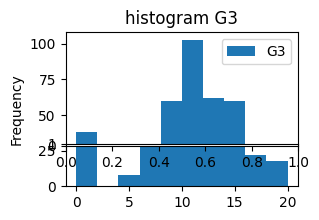

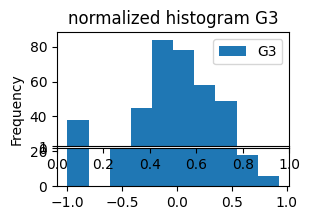

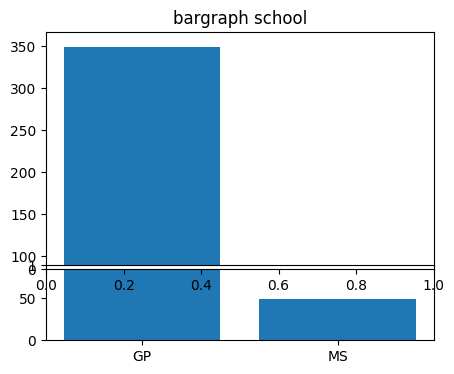

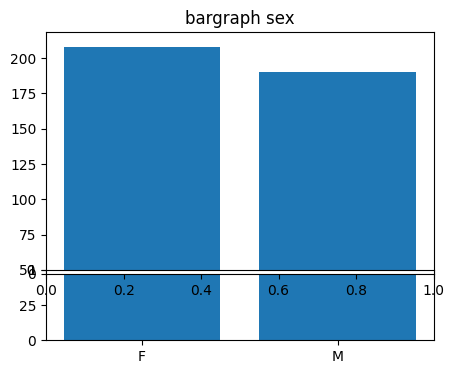

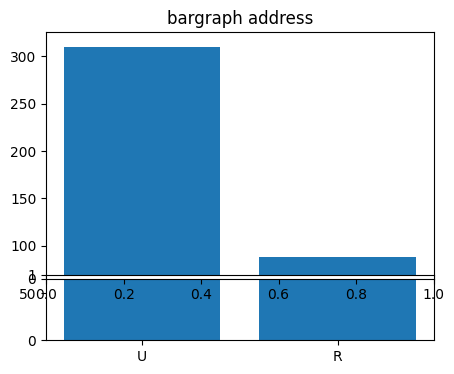

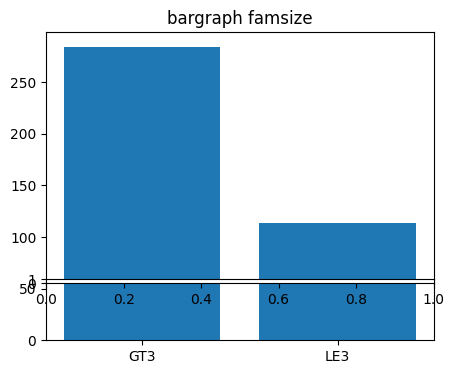

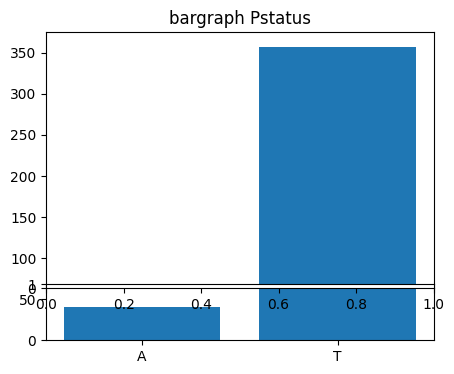

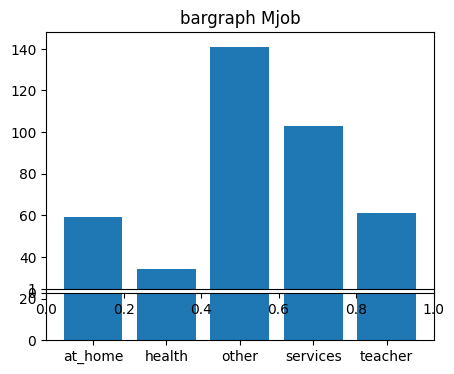

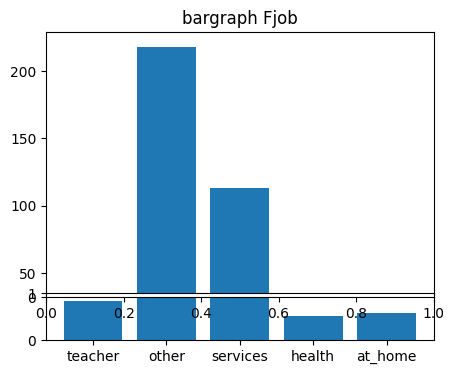

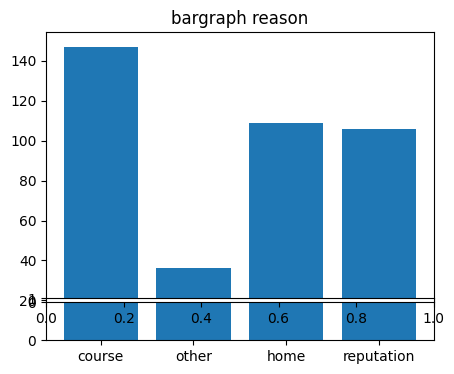

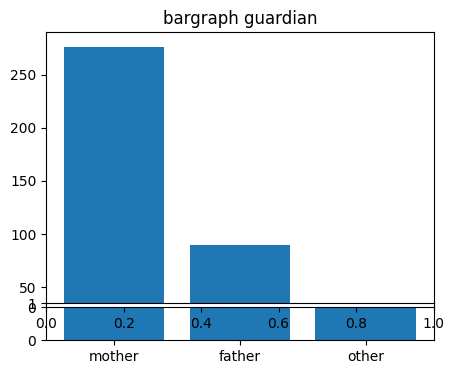

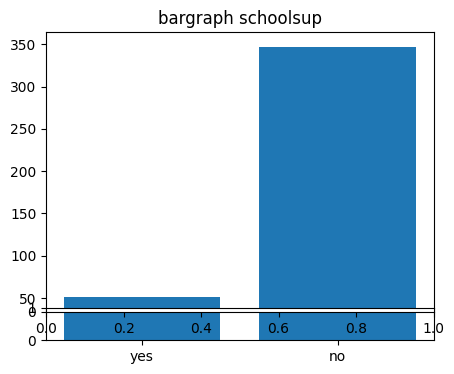

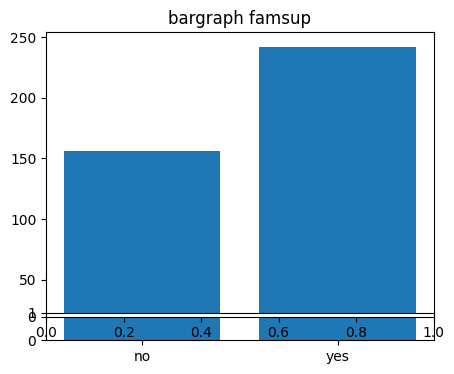

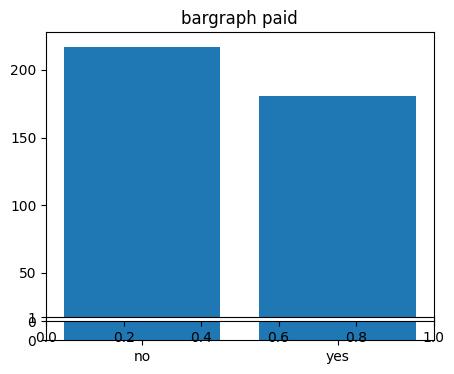

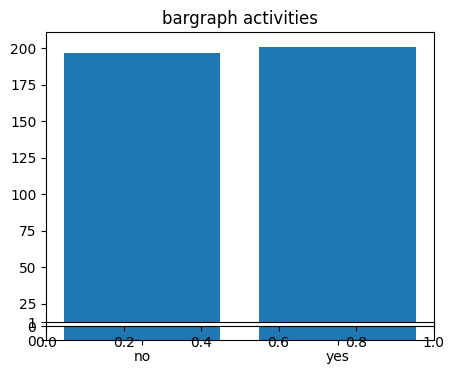

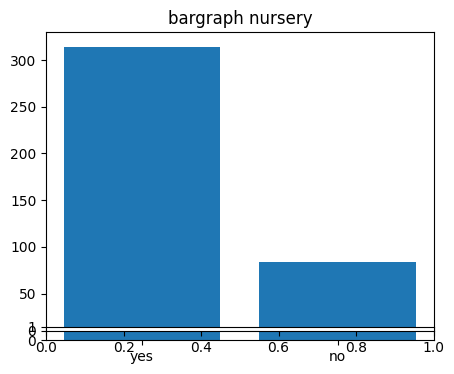

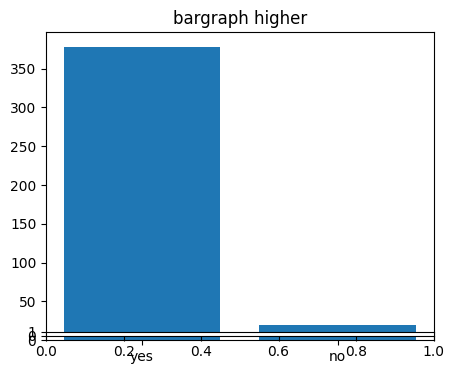

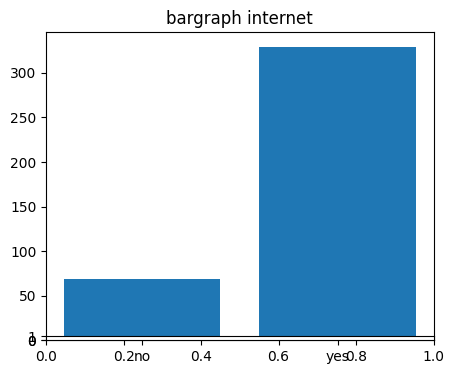

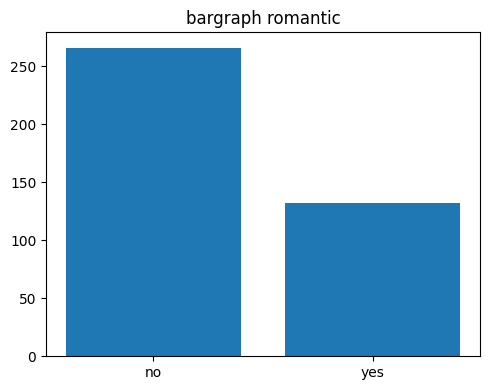

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as m

data = pd.read_csv("Math-Students.csv", sep=",");

print(data.head());

print(data.axes);

print(data);

print(data.at[0,data.axes[1][2]]);

print(data.axes[0]);

numbers = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'];



nonnum = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'];

print(data.std(numeric_only=True));

mean = data.mean(numeric_only=True);
std = data.mean(numeric_only=True);

normdata = (data - mean)/std

sub = 1;
j = 0;

for axis in numbers:
    plt.subplot(65,1,sub);
    data.plot.box(column=axis, figsize=(3,2));
    plt.title("boxplot " + str(axis));
    name='plots/test'+str(sub) + ".png";
    sub+=1;
    plt.savefig(name, format='png');

    plt.subplot(65,1,sub);
    data.plot.hist(column=axis, figsize=(3,2));
    plt.title("histogram " + str(axis));
    name='plots/test'+str(sub) + ".png";
    sub+=1;
    plt.savefig(name, format='png');

    plt.subplot(65,1,sub);
    normdata.plot.hist(column=axis, figsize=(3,2))
    plt.title("normalized histogram " + str(axis));
    name='plots/test'+str(sub) + ".png";
    sub+=1;
    plt.savefig(name, format='png');
    
    k = 0;
    for other in numbers:
        if(k>j):
            axisnums = [];
            othernums = [];

            for i in range(0,398):
                axisnums.append(data.at[i,axis]);
                othernums.append(data.at[i,other]);
                
            semivaraxis = [];
            semivarother = [];
            semicov = [];
            
            for i in range(0, 398):
                semivaraxis.append((np.mean(axisnums) - data.at[i,axis]) **2);
                semivarother.append((np.mean(othernums) - data.at[i,other]) **2);
                semicov.append((data.at[i,axis]-np.mean(axisnums))*(data.at[i,other]-np.mean(othernums)));
            
            varaxis = np.mean(semivaraxis);
            varother = np.mean(semivarother);
            cov = np.mean(semicov);
            cor = cov/(m.sqrt(varaxis*varother));
            print("correlation of " + axis + " and " + other + ": " + str(cor));
        k+=1;
    j+=1;

for axis in nonnum:
    plt.subplot(65,1,sub);

    types = [data.at[0,axis]];
    numpertype = [1];

    for i in range(1,398):
        #print(i);
        #print(numpertype);
        prev = False;
        index=0;
        for kind in types:
            if(data.at[i,axis] == kind):
                numpertype[index]+=1;
                prev=True;
        

            index+=1;

        if(not prev):
            #print(data.at[i,axis]);
            types.append(data.at[i,axis]);
            numpertype.append(1);

    
    plt.figure(figsize=(5,4));
    plt.bar(types, numpertype);
    plt.title("bargraph " + str(axis));
    name='plots/test'+str(sub) + ".png";
    sub+=1;
    plt.savefig(name, format='png');
                        


    

plt.tight_layout();
plt.show();

plt.close();




#print(data['school']);

#sns.histplot(data['age'], kde=True);
